### Imports

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, LSTM, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPool1D, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

plt.style.use('ggplot')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv


In [2]:
data = pd.read_csv('/kaggle/input/malware-analysis-datasets-api-call-sequences/dynamic_api_call_sequence_per_malware_100_0_306.csv')

In [3]:
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [4]:
used_data = data.drop(['hash', 'malware'], axis=1)

In [5]:
used_data.head()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
1,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
2,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
3,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
4,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


### Classes distribution

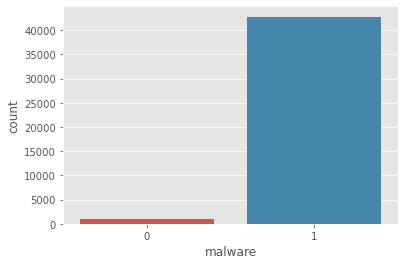

In [6]:
sns.countplot(data['malware'])

### splitting the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['malware'], test_size=0.25, 
                                                    shuffle=True, random_state=42)

In [8]:
X_train.shape

(32907, 100)

### Building the model

In [9]:
unique_api_calls = 307

In [10]:
model = Sequential(name="Cnn-Lstm_model")
model.add(Embedding(input_dim=unique_api_calls, output_dim=8,
                    input_length=X_train.shape[1], name='layer_embedding'))
model.add(BatchNormalization())
model.add(Conv1D(filters = 32, kernel_size = 9, padding = 'same', activation = 'relu'))
model.add(MaxPool1D(pool_size = 2))
model.add(LSTM(units=512, return_sequences=False, dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
model.summary()

Model: "Cnn-Lstm_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_embedding (Embedding)  (None, 100, 8)            2456      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 8)            32        
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           2336      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1116160   
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 1,121,497
Trainable params: 1,121,481
Non-trainable params: 16
_________________________________________

In [12]:
optimizer = Adam(lr=.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Training model

In [13]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=512)

Epoch 1/150
52/52 [==============================] - 3s 60ms/step - loss: 0.2095 - accuracy: 0.9720 - val_loss: 0.5237 - val_accuracy: 0.9771
Epoch 2/150
52/52 [==============================] - 2s 42ms/step - loss: 0.1074 - accuracy: 0.9755 - val_loss: 0.5162 - val_accuracy: 0.9771
Epoch 3/150
52/52 [==============================] - 2s 41ms/step - loss: 0.1002 - accuracy: 0.9755 - val_loss: 0.5163 - val_accuracy: 0.9771
Epoch 4/150
52/52 [==============================] - 2s 42ms/step - loss: 0.0918 - accuracy: 0.9755 - val_loss: 0.4935 - val_accuracy: 0.9771
Epoch 5/150
52/52 [==============================] - 2s 44ms/step - loss: 0.0860 - accuracy: 0.9755 - val_loss: 0.4651 - val_accuracy: 0.9771
Epoch 6/150
52/52 [==============================] - 2s 46ms/step - loss: 0.0785 - accuracy: 0.9755 - val_loss: 0.4424 - val_accuracy: 0.9771
Epoch 7/150
52/52 [==============================] - 2s 43ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.4206 - val_accuracy: 0.9815
Epoch 

52/52 [==============================] - 2s 41ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 59/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0342 - val_accuracy: 0.9921
Epoch 60/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0315 - val_accuracy: 0.9926
Epoch 61/150
52/52 [==============================] - 2s 46ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.0329 - val_accuracy: 0.9916
Epoch 62/150
52/52 [==============================] - 2s 42ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0327 - val_accuracy: 0.9926
Epoch 63/150
52/52 [==============================] - 2s 44ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0356 - val_accuracy: 0.9915
Epoch 64/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0352 - val_accuracy: 0.9916
Epoch 65/150

52/52 [==============================] - 2s 43ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0370 - val_accuracy: 0.9923
Epoch 116/150
52/52 [==============================] - 2s 43ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0344 - val_accuracy: 0.9926
Epoch 117/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0293 - val_accuracy: 0.9918
Epoch 118/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0322 - val_accuracy: 0.9924
Epoch 119/150
52/52 [==============================] - 2s 41ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.0421 - val_accuracy: 0.9926
Epoch 120/150
52/52 [==============================] - 2s 42ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.0372 - val_accuracy: 0.9923
Epoch 121/150
52/52 [==============================] - 2s 45ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0357 - val_accuracy: 0.9915
Epoch 

In [14]:
model.save('behavioral-malware-detection-based-on-api-calls_model.h5')

Text(0.5, 0, 'Epochs')

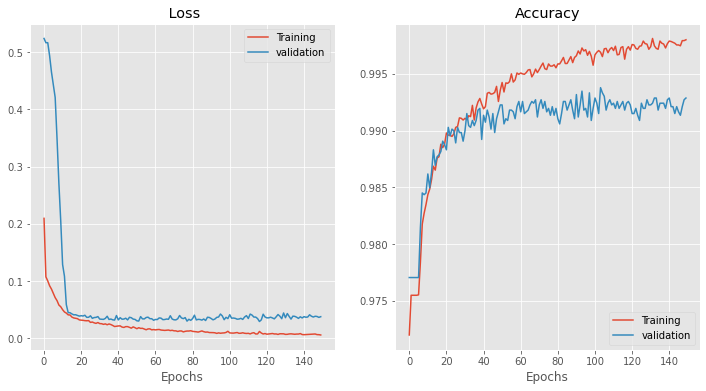

In [15]:
fig, ax = plt.subplots(1,2, figsize=[12,6])
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title(" Loss")
ax[0].legend(("Training", "validation"), loc="upper right")
ax[0].set_xlabel("Epochs")
ax[1].plot(history.history["accuracy"])
ax[1].plot(history.history["val_accuracy"])
ax[1].legend(("Training", "validation"), loc="lower right")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")

### Evaluating model

In [16]:
y_pred = model.predict_classes(X_test)

In [17]:
print("CNN_LSTM model classification report: \n\n {}".format(classification_report(np.array(y_test), y_pred.flatten())))

CNN_LSTM model classification report: 

               precision    recall  f1-score   support

           0       0.90      0.74      0.81       283
           1       0.99      1.00      1.00     10686

    accuracy                           0.99     10969
   macro avg       0.95      0.87      0.90     10969
weighted avg       0.99      0.99      0.99     10969



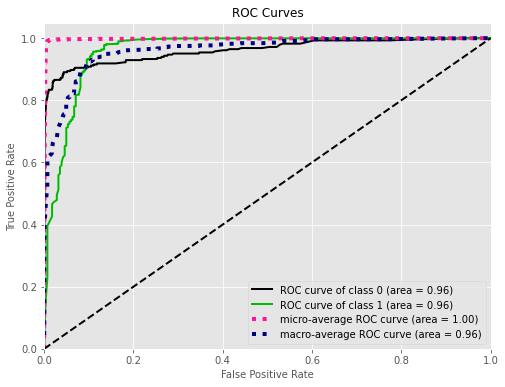

In [18]:
probas = model.predict_proba(X_test, batch_size=64)
probas=np.array([[1-probas[i][0], probas[i][0]] for i in range(len(probas))]).reshape(probas.shape[0], 2)
skplt.metrics.plot_roc(np.array(y_test), probas, figsize=(8, 6))

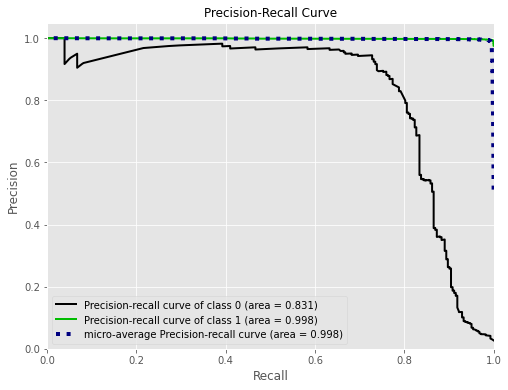

In [19]:
skplt.metrics.plot_precision_recall(np.array(y_test), probas, figsize=(8, 6))

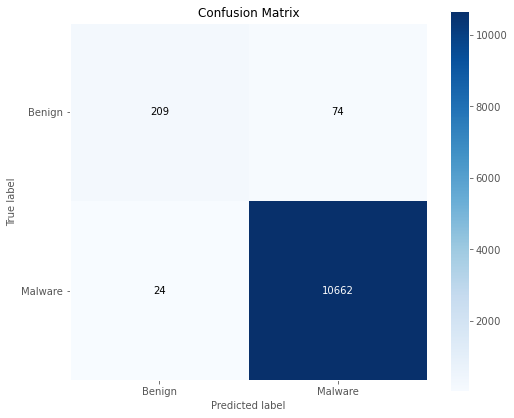

In [20]:
ax=skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8, 7))
tickx=ax.set_xticklabels(['Benign', 'Malware'])
ticky=ax.set_yticklabels(['Benign', 'Malware'])